In [3]:
%matplotlib inline
# autoreload
%load_ext autoreload
%autoreload 2

In [4]:
import scipy
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

pdf = scipy.stats.norm.pdf(0, loc=0, scale=1)

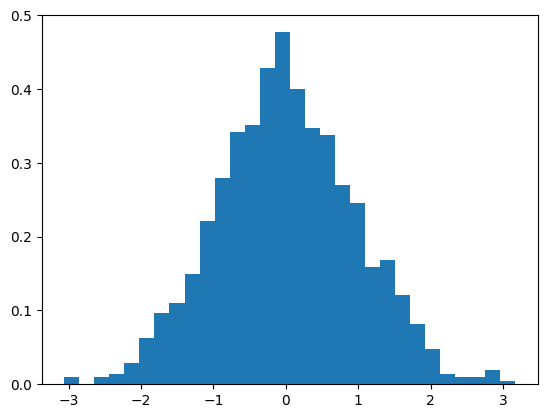

In [5]:
# generate some data
rvs = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(rvs, bins=30, density=True);

0.999999564276752

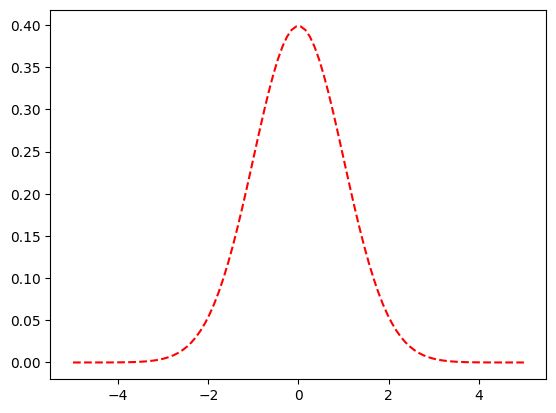

In [6]:
# plot the pdf
x = np.linspace(-5, 5, 100)
y = norm.pdf(x, loc=0, scale=1)

plt.plot(x, y, 'r--')
np.sum(y) * (x[1] - x[0])

0.999999564276752

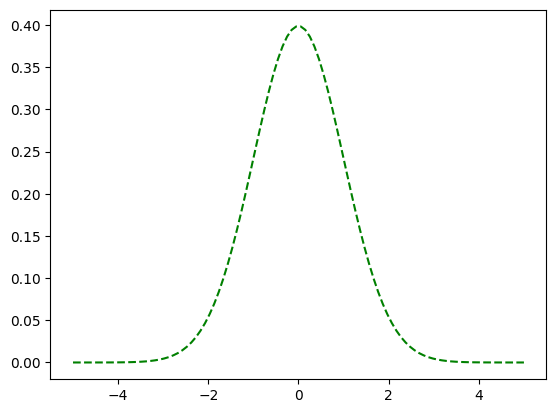

In [7]:
# make sure the pdf is correct, and that it integrates to 1
npdf = lambda x: np.exp(-x**2/2) / np.sqrt(2*np.pi)

y2 = npdf(x)
plt.plot(x, y2, 'g--')
np.sum(y2) * (x[1] - x[0])

In [11]:
# compute the log likelihood of the given model

def standard_norm_score(x):
    """
    The standard normal distribution is given by N(0, 1): exp(-x**2/2) / sqrt(2*pi)
    the score is the derivative of the log of the pdf: d/dx log(pdf(x))
    the analytical solution is thus: -x
    """
    return -x

def stochastic_langevin_dynamics(x_prev, step_size=0.1):
    """
    The stochastic langevin dynamics is given by the following equation:
    x_{t+1} = x_t + h/2 * score(x_t) + sqrt(h) * N(0, 1)
    where h is the step size, and N(0, 1) is a sample from the standard normal distribution
    """
    x_next = x_prev + step_size/2 * standard_norm_score(x_prev) + np.sqrt(step_size) * np.random.normal()
    return x_next

100%|██████████| 20000/20000 [00:00<00:00, 347319.85it/s]


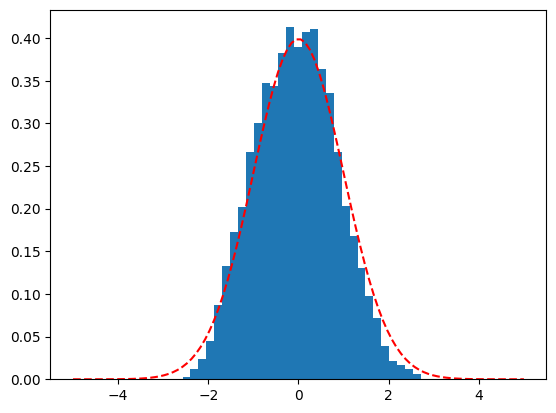

In [12]:
# test the stochastic langevin dynamics
xs = [-20]
for i in tqdm(range(20000)):
    xs.append(stochastic_langevin_dynamics(xs[-1], step_size=0.01))

plt.hist(xs[1000:], bins=30, density=True);
plt.plot(x, y, 'r--')

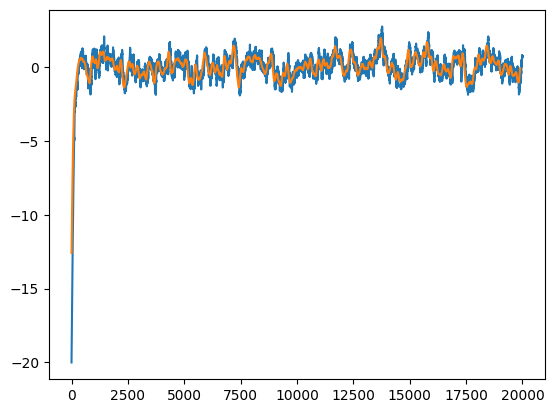

In [10]:
# show how the burn-in period affects the samples
plt.plot(xs)
# gliding average
plt.plot(np.convolve(xs, np.ones(100)/100, mode='valid'))